In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
dapi = pd.read_csv("eval_DAPI_rs.csv")
dapi = dapi.drop(columns = ["Unnamed: 0"], axis = 1)
dapi

,file,mse,ssim,pearson
0,79_prediction_c0.jpeg,2.984858,0.007275,-0.091150
1,70_prediction_c0.jpeg,8.307061,0.004192,-0.029642
2,137_prediction_c0.jpeg,56.958959,0.011958,0.060437
3,103_prediction_c0.jpeg,22.391166,0.012109,0.049624
4,83_prediction_c0.jpeg,2.075565,0.059509,-0.091591
5,21_prediction_c0.jpeg,3.277550,0.043669,-0.069570
6,116_prediction_c0.jpeg,3.553771,0.102526,0.066838
7,84_prediction_c0.jpeg,3.239576,0.186299,0.076010
8,1_prediction_c0.jpeg,8.291199,0.024594,0.094726
9,10_prediction_c0.jpeg,3.475614,0.036971,0.087694


In [47]:
pax = pd.read_csv("eval_whitescan_Pax7_rs.csv")
pax = pax.drop(columns = ["Unnamed: 0"], axis = 1)
pax

,file,mse,ssim,pearson
0,79_prediction_c0.jpeg,22.245959,0.020533,0.014707
1,70_prediction_c0.jpeg,11.029974,0.020311,0.003002
2,137_prediction_c0.jpeg,13.925950,0.014798,0.007941
3,103_prediction_c0.jpeg,14.807314,0.017212,0.015218
4,83_prediction_c0.jpeg,20.423653,0.009805,0.004660
5,21_prediction_c0.jpeg,12.083274,0.010231,0.008726
6,116_prediction_c0.jpeg,14.882215,0.013260,0.013784
7,84_prediction_c0.jpeg,13.792392,0.010868,0.004511
8,1_prediction_c0.jpeg,31.502405,0.029850,0.023699
9,10_prediction_c0.jpeg,20.458358,0.023351,0.015846


In [37]:
mask = [file in dapi["file"].values for file in pax["file"].values]
mask

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [38]:
pax = pax[mask]

In [39]:
mask2 = [file in pax["file"].values for file in dapi["file"].values]
mask2

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [40]:
dapi = dapi[mask2]

In [41]:
pax = pax.reset_index()

In [42]:
dapi = dapi.reset_index()

In [48]:
pax['ssim'] = np.absolute(pax['ssim'])
pax['pearson'] = np.absolute(pax['pearson'])
pax

,file,mse,ssim,pearson
0,79_prediction_c0.jpeg,22.245959,0.020533,0.014707
1,70_prediction_c0.jpeg,11.029974,0.020311,0.003002
2,137_prediction_c0.jpeg,13.925950,0.014798,0.007941
3,103_prediction_c0.jpeg,14.807314,0.017212,0.015218
4,83_prediction_c0.jpeg,20.423653,0.009805,0.004660
5,21_prediction_c0.jpeg,12.083274,0.010231,0.008726
6,116_prediction_c0.jpeg,14.882215,0.013260,0.013784
7,84_prediction_c0.jpeg,13.792392,0.010868,0.004511
8,1_prediction_c0.jpeg,31.502405,0.029850,0.023699
9,10_prediction_c0.jpeg,20.458358,0.023351,0.015846


In [44]:
dapi['ssim'] = np.absolute(dapi['ssim'])
dapi['pearson'] = np.absolute(dapi['pearson'])
dapi

,index,file,mse,ssim,pearson
0,0,79_prediction_c0.jpeg,2.984858,0.007275,0.091150
1,1,70_prediction_c0.jpeg,8.307061,0.004192,0.029642
2,2,137_prediction_c0.jpeg,56.958959,0.011958,0.060437
3,3,103_prediction_c0.jpeg,22.391166,0.012109,0.049624
4,4,83_prediction_c0.jpeg,2.075565,0.059509,0.091591
5,5,21_prediction_c0.jpeg,3.277550,0.043669,0.069570
6,6,116_prediction_c0.jpeg,3.553771,0.102526,0.066838
7,7,84_prediction_c0.jpeg,3.239576,0.186299,0.076010
8,8,1_prediction_c0.jpeg,8.291199,0.024594,0.094726
9,9,10_prediction_c0.jpeg,3.475614,0.036971,0.087694


In [49]:
pax.describe()

,mse,ssim,pearson
count,29.000000,29.000000,29.000000
mean,18.793325,0.022506,0.012388
std,7.106653,0.019328,0.007663
min,4.572948,0.008479,0.000382
25%,12.548660,0.012844,0.008350
50%,19.367966,0.016789,0.012212
75%,25.662720,0.020533,0.014707
max,31.502405,0.097550,0.039485


In [46]:
dapi.describe()

,index,mse,ssim,pearson
count,29.000000,29.000000,29.000000,29.000000
mean,14.000000,9.507312,0.047429,0.064863
std,8.514693,14.228548,0.080941,0.036285
min,0.000000,0.902556,0.004192,0.005240
25%,7.000000,2.296117,0.010994,0.047397
50%,14.000000,3.277550,0.013359,0.060437
75%,21.000000,8.307061,0.053506,0.076010
max,28.000000,56.958959,0.406692,0.200964


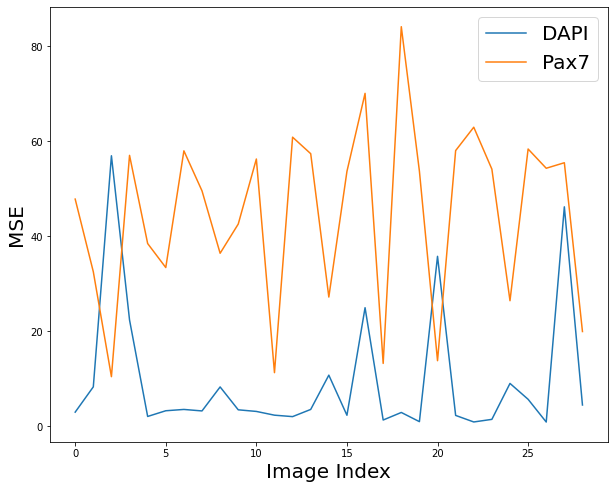

In [14]:
plt.figure(figsize = (10,8))
plt.plot(dapi["mse"], label = "DAPI")
plt.plot(pax["mse"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("mse_comparison.png")

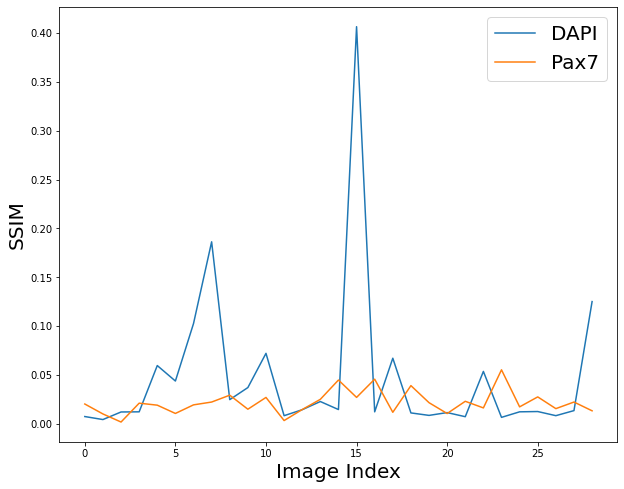

In [15]:
plt.figure(figsize = (10,8))
plt.plot(dapi["ssim"], label = "DAPI")
plt.plot(pax["ssim"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("SSIM", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("ssim_comparison.png")

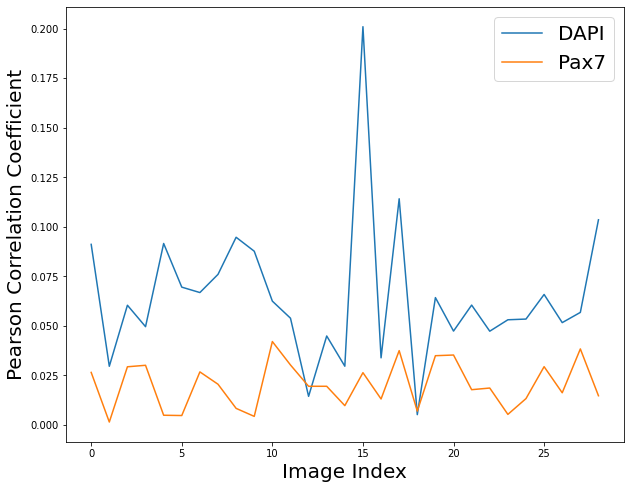

In [16]:
plt.figure(figsize = (10,8))
plt.plot(dapi["pearson"], label = "DAPI")
plt.plot(pax["pearson"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("Pearson Correlation Coefficient", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("pearson_comparison.png")

## Scatter Plot versions

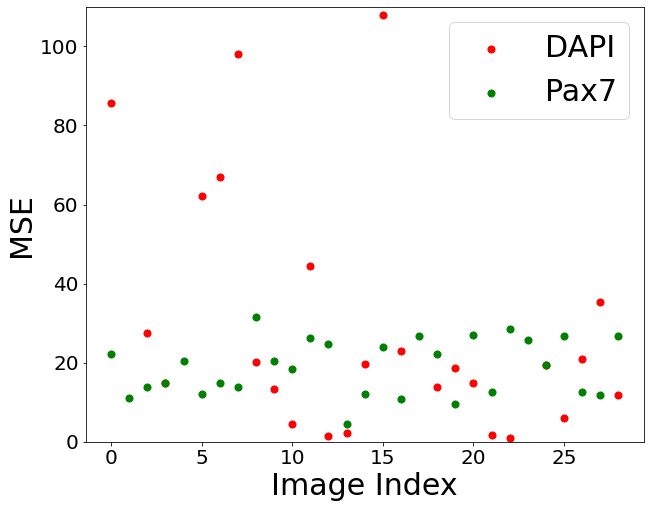

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(dapi.index.values, dapi["mse"], c="red", label = "DAPI", s=50)
plt.scatter(pax.index.values, pax["mse"], c="green", label = "Pax7", s=50)
plt.xlabel("Image Index", fontsize=30)
plt.ylabel("MSE", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.ylim((-0.05,110))
plt.savefig("mse_comparison_scatter_whitescan.png")

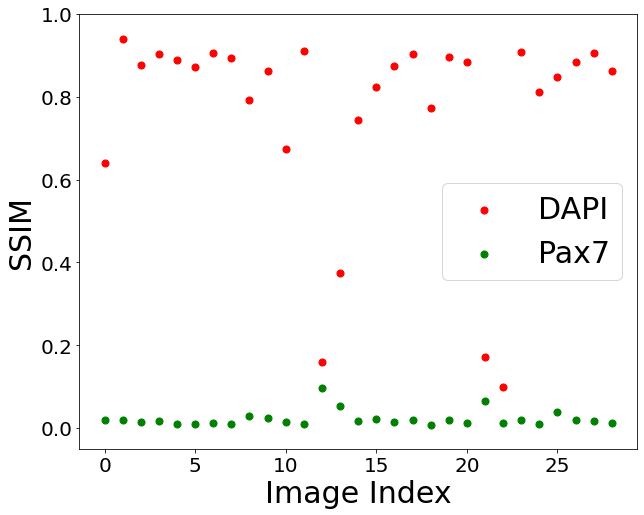

In [33]:
plt.figure(figsize = (10,8))
plt.scatter(dapi.index.values, dapi["ssim"], c="red", label = "DAPI", s=50)
plt.scatter(pax.index.values, pax["ssim"], c="green", label = "Pax7", s=50)
plt.xlabel("Image Index", fontsize=30)
plt.ylabel("SSIM", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.ylim((-0.05,1))
plt.savefig("ssim_comparison_scatter_whitescan.png")

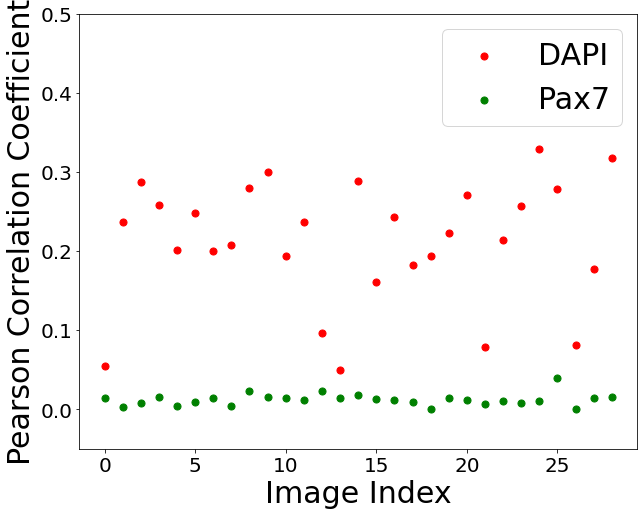

In [34]:
plt.figure(figsize = (10,8))
plt.scatter(dapi.index.values, dapi["pearson"], c="red", label = "DAPI", s=50)
plt.scatter(pax.index.values, pax["pearson"], c="green", label = "Pax7", s=50)
plt.xlabel("Image Index", fontsize=30)
plt.ylabel("Pearson Correlation Coefficient", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.ylim((-0.05,0.5))
plt.savefig("pearson_comparison_scatter_whitescan.png")